HW0916_03
(a) Find the mean and standard deviation of returns of these five stocks.

(b) Plot the mean and risk (standard deviation) for these five returns using red stars in the 2-dimensional plane.

(c) Randomly selected weights so that each weight is non-negative and sums up to one. Print the random weight, the mean, and standard deviation of the portfolio.

(d) Repeat (c) for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane in (b).

(e) Draw the efficiency frontier in the figure of (b), assuming that no short sales are allowed.

FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64
FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64


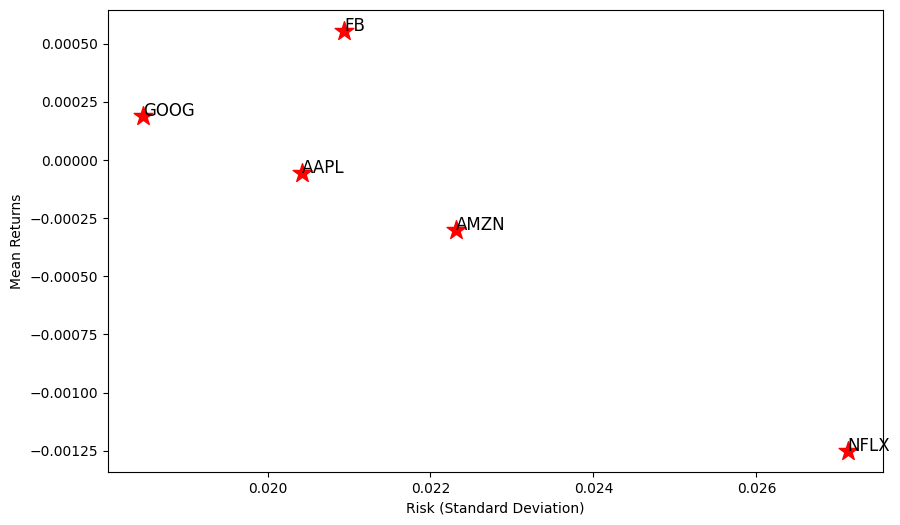

Random Weights: [0.37372431 0.25009195 0.11976325 0.07985015 0.17657034]
Portfolio Mean: 7.102079403014659e-05
Portfolio Standard Deviation: 0.01781893980536889


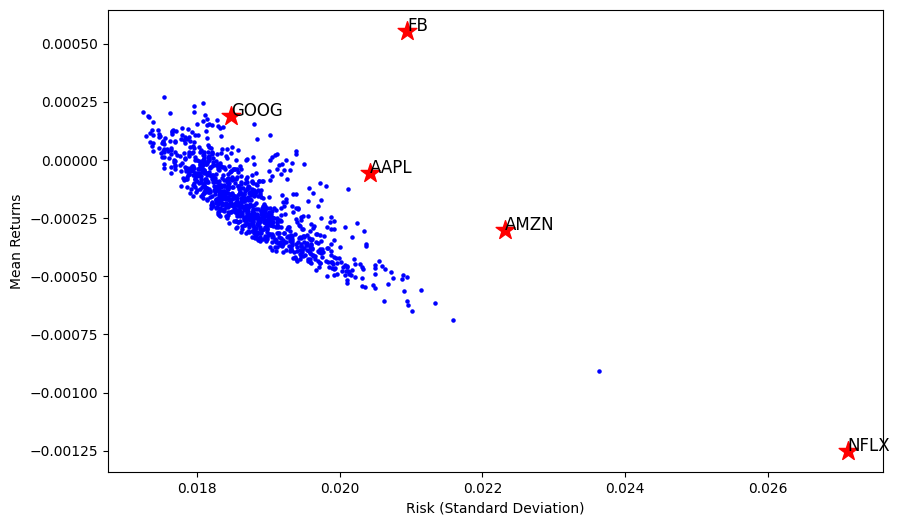

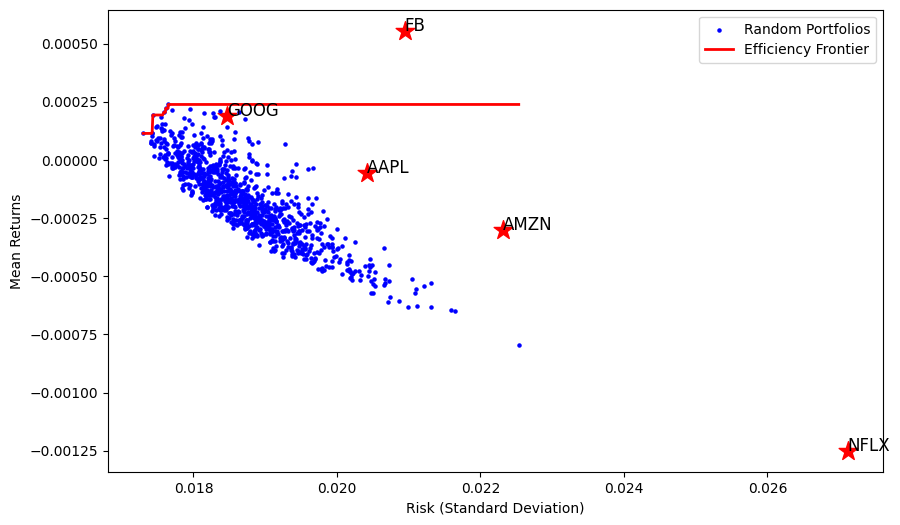

In [8]:
import pandas as pd
stock = pd.read_csv("Stocks_ClosePrice.csv")

mean_returns = stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].mean()
print(mean_returns)

std_returns = stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].std()
print(std_returns)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)

for i, txt in enumerate(mean_returns.index):
    plt.text(std_returns.iloc[i], mean_returns.iloc[i], txt.replace('.1', ''), fontsize=12)

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.show()


import numpy as np

np.random.seed(25)
weights = np.random.rand(len(mean_returns))
weights /= np.sum(weights)

portfolio_mean = np.dot(weights, mean_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].cov(), weights)))

print("Random Weights:", weights)
print("Portfolio Mean:", portfolio_mean)
print("Portfolio Standard Deviation:", portfolio_std)

portfolio_means = []
portfolio_stds = []

for _ in range(1000):
    weights = np.random.rand(len(mean_returns))
    weights /= weights.sum()

    portfolio_mean = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].cov(), weights)))

    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)
for i, txt in enumerate(mean_returns.index):
    plt.text(std_returns.iloc[i], mean_returns.iloc[i], txt.replace('.1', ''), fontsize=12)

plt.scatter(portfolio_stds, portfolio_means, color='blue', s=5)
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.show()


portfolio_means = []
portfolio_stds = []

for _ in range(1000):
    weights = np.random.rand(len(mean_returns))
    weights /= np.sum(weights)

    portfolio_mean = np.dot(weights, mean_returns)
    cov_matrix = stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].cov().values
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std = np.sqrt(portfolio_var)

    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

efficient_frontier_means = []
efficient_frontier_stds = []

sorted_stds = np.sort(np.unique(portfolio_stds))
for std in sorted_stds:
    max_mean = max(mean for mean, std_dev in zip(portfolio_means, portfolio_stds) if std_dev <= std)
    efficient_frontier_means.append(max_mean)
    efficient_frontier_stds.append(std)

plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)
for i, txt in enumerate(mean_returns.index):
    plt.text(std_returns.iloc[i], mean_returns.iloc[i], txt.replace('.1', ''), fontsize=12)

plt.scatter(portfolio_stds, portfolio_means, color='blue', s=5, label='Random Portfolios')
plt.plot(efficient_frontier_stds, efficient_frontier_means, color='red', label='Efficiency Frontier', linewidth=2)

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.legend()
plt.show()






Explanation:
Mean & Standard Deviation: The returns for each stock are calculated, followed by computing their mean and standard deviation.
Portfolio Calculation: A random portfolio is simulated with normalized weights, and its mean return and risk (standard deviation) are computed.
Random Portfolio Simulation: The loop generates 1000 portfolios with random weights and stores their returns and risks.
Efficient Frontier: The portfolio with the best Sharpe Ratio (risk-adjusted return) is plotted in red, representing the efficiency frontier.